In [1]:
from visfit.main import VisFit1D
%load_ext autoreload
%autoreload 2

obsmsfile = "/raid/work/yamato/eDisk_data/L1489IRS/eDisk_calibrated_data/L1489IRS_SB1_continuum.ms"

model = VisFit1D(obsmsfile=obsmsfile)
model.load_vis()

rm: '/raid/work/yamato/eDisk_data/L1489IRS/eDisk_calibrated_data/L1489IRS_SB1_continuum.ms.split.temp' を削除できません: そのようなファイルやディレクトリはありません


/home/yamato/Project/visfit/visfit/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  err = 1.0 / np.sqrt(w)
/home/yamato/Project/visfit/visfit/utils.py:21: RuntimeWarning: invalid value encountered in true_divide
  return yw / w, err, edge_yw, num_yw


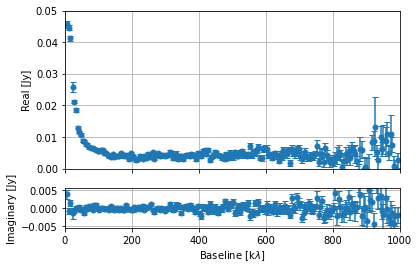

In [6]:
fig, axes = model.plot_vis(
    axes=None, incl=73, PA=69, binsize=5, uvmax=1000, fmt="o", capsize=3, markersize=5
)  # , ecolor='black', markeredgecolor='black', color='black')
axes[0].set(ylim=(0.0, 0.05), xlim=(0,1000))
axes[1].set(ylim=(-0.0055, 0.0055), xlim=(0, 1000))
for ax in axes:
    ax.grid()

In [4]:
import numpy as np 

def model_func_1d(r, I_g, sigma_g, I_p, sigma_p):
    return 10 ** I_g * np.exp(- 0.5 * r ** 4 / sigma_g ** 4) + 10 ** I_p * np.exp(- 0.5 * r ** 4 / sigma_p ** 4)

param_dict = {'I_g': {'p0': 6.0, 'bound': (-2., 11.), 'fixed': False},
              'sigma_g': {'p0': 1.0, 'bound': (0.1, 10), 'fixed': False},
              'I_p': {'p0': 8.8, 'bound': (-2., 11.), 'fixed': False},
              'sigma_p': {'p0': 0.01, 'bound': (1e-5, 0.1), 'fixed': False},
              }

model.fit_vis(model_func_1d=model_func_1d, param_dict=param_dict, nwalker=32, nstep=500)

starting to run the MCMC sampling with: 
 	 initial state: [6.0, 1.0, 8.8, 0.01] 
 	 number of walkers: 32 
 	 number of steps: 500


  0%|          | 2/500 [00:06<25:17,  3.05s/it]Traceback (most recent call last):
  File "/home/yamato/Project/visfit/.venv/lib/python3.8/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/yamato/Project/visfit/visfit/main.py", line 224, in log_probability
    ll = log_likelihood(param)
  File "/home/yamato/Project/visfit/visfit/main.py", line 205, in log_likelihood
    model_vis = self.sample_vis(model_func_1d, param_dict)
  File "/home/yamato/Project/visfit/visfit/main.py", line 269, in sample_vis
    vis = sampleProfile(
KeyboardInterrupt
  0%|          | 2/500 [00:07<29:22,  3.54s/it]

emcee: Exception while calling your likelihood function:
  params: [6.00017284 1.00041547 8.79972575 0.01004263]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 